In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import scipy
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings("ignore")

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print(train.shape)

(1460, 81)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### df.describe shows that 38 Columns are Numeric, hence the others are categorical according to algo, we need to check again though

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Let's look at the pandas profiling of this dataset to better understand****

In [6]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [7]:
profile.to_file(output_file='output.html')

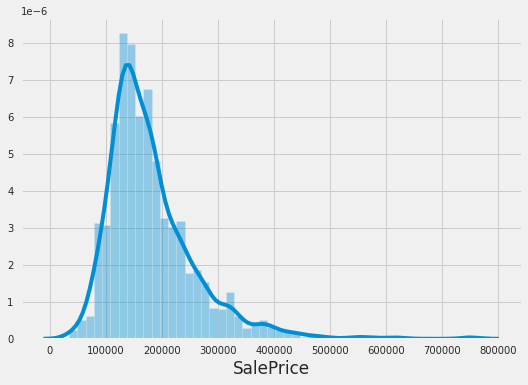

In [8]:
plt.style.use('fivethirtyeight')
sns.distplot(train.SalePrice)

### let's Transform this Sales price - We can use BoxCox Transformation to convert to normal distribtion

In [9]:
from fitter import Fitter
f = Fitter(train.SalePrice)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
# Fitting a lot of Distribution Function to find the best one.

Fitted alpha distribution with error=2.5369494219501643e-11)
Fitted anglit distribution with error=4.4089330062929014e-10)
Fitted arcsine distribution with error=6.004052836271086e-10)
Fitted argus distribution with error=5.204315816663266e-10)
Fitted beta distribution with error=4.7250770232924254e-11)
Fitted betaprime distribution with error=2.8501598775456137e-11)
Fitted bradford distribution with error=3.696715190485751e-10)
Fitted burr distribution with error=6.575399570812039e-11)
Fitted burr12 distribution with error=6.116740817137073e-10)
Fitted cauchy distribution with error=6.686747335799632e-11)
Fitted chi distribution with error=6.857328482340217e-10)
Fitted chi2 distribution with error=8.602061055747797e-11)
Fitted cosine distribution with error=3.8472632623203273e-10)
Fitted crystalball distribution with error=3.951701068479159e-10)
Fitted dgamma distribution with error=5.3251488817894886e-11)
Fitted dweibull distribution with error=6.554645709415145e-11)
Fitted erlang di

,sumsquare_error,aic,bic,kl_div
johnsonsu,1.864529e-11,3061.307922,-46678.618971,inf
exponnorm,1.927716e-11,3097.639427,-46637.247595,inf
alpha,2.536949e-11,3080.400549,-46236.292899,inf
fisk,2.582604e-11,3069.347358,-46210.252544,inf
moyal,2.769181e-11,3091.579621,-46115.698658,inf


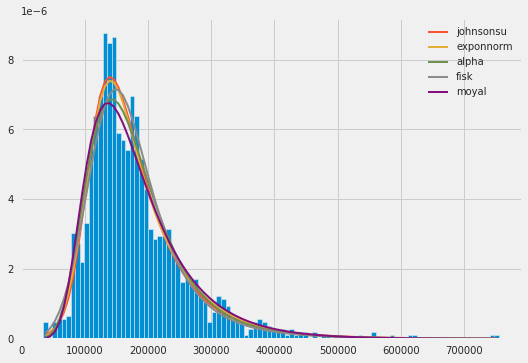

In [10]:
f.summary()

*JohnsonSu is the best fitting distribution to the Target Variable. Will be Helpful later*

Text(0.5, 1.0, 'Probplot against normal distribution')

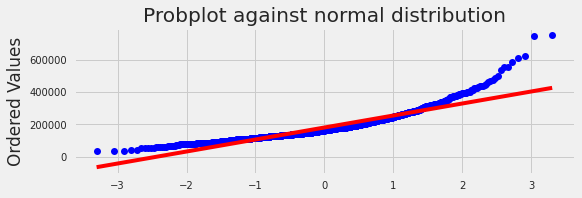

In [11]:
# This Graph is to compare your graph against a Normal Distribution
from scipy import stats
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(train.SalePrice, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

Text(0.5, 1.0, 'Probplot against normal distribution')

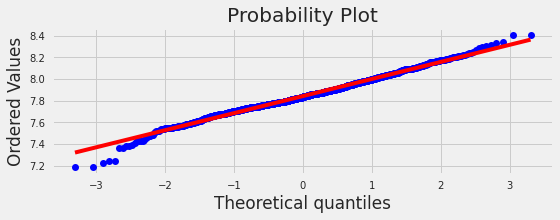

In [12]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
Yt, gamma = stats.boxcox(train.SalePrice)
prob = stats.probplot(Yt, dist=stats.norm, plot=ax2)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

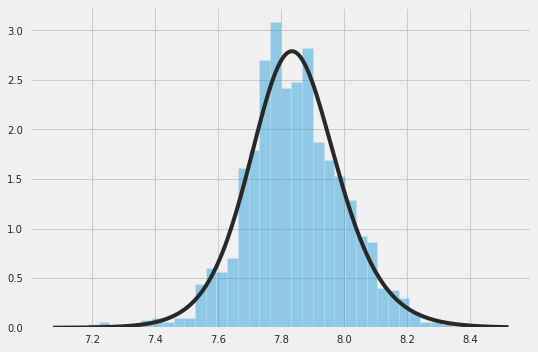

In [23]:
## This shows that SalePrice is now Close to normal and can be used better- WE'll be using this whenever necessary
sns.distplot(Yt, fit=stats.johnsonsu)

In [14]:
!pip install dabl

     |████████████████████████████████| 559 kB 4.2 MB/s eta 0:00:01
  Created wheel for dabl: filename=dabl-0.1.8-py3-none-any.whl size=565074 sha256=e49967b474fabc1f9a8a409fc21c4edeb60e0b39882ca17cbb539ca70df909da
  Stored in directory: /root/.cache/pip/wheels/7c/af/ff/c9dcf3a36a987779f97c3ff6aeffd705e1e1108f48d5de5503
Successfully built dabl


Target looks like regression
Showing only top 10 of 22 continuous features
Showing only top 10 of 45 categorical features


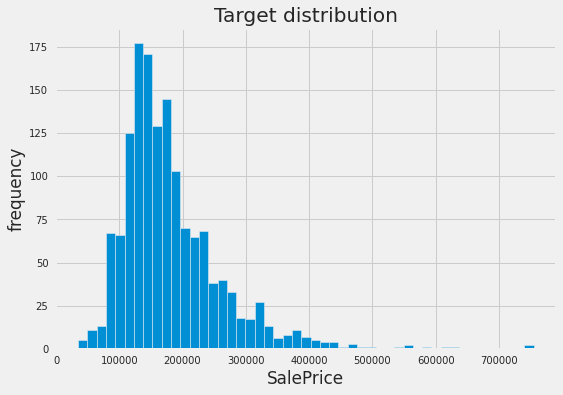

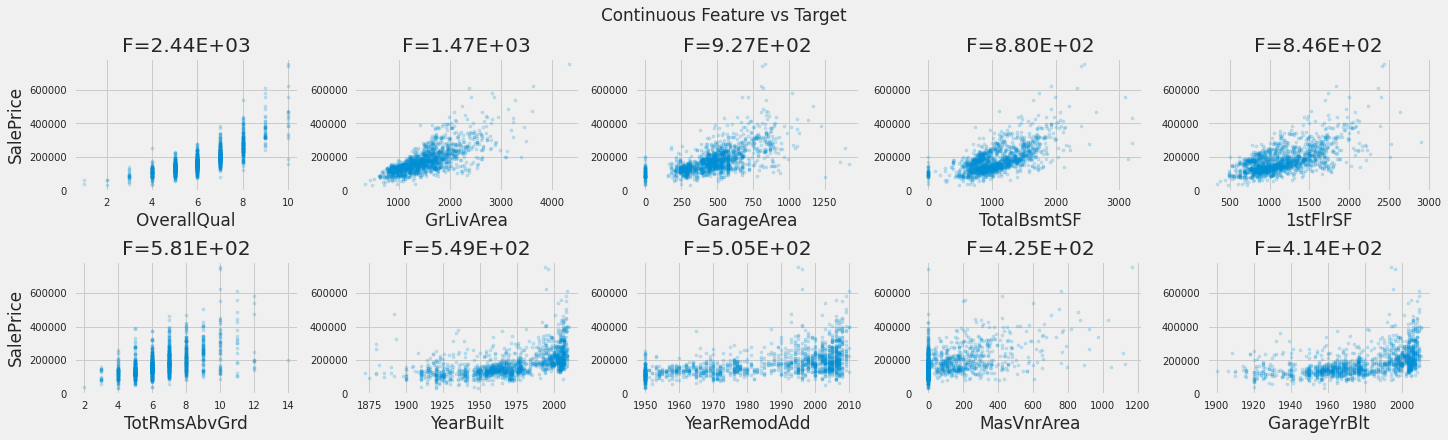

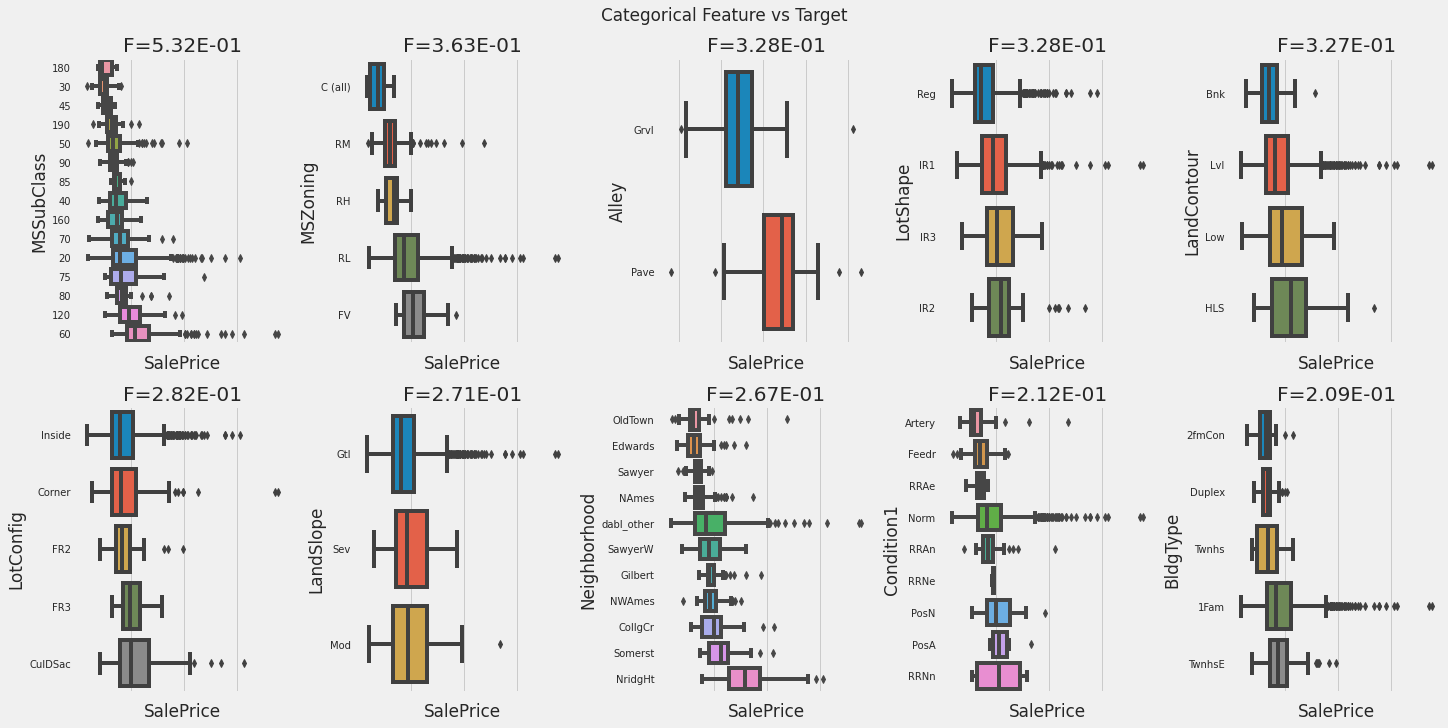

In [15]:
import dabl
dabl.plot(train, target_col = 'SalePrice')

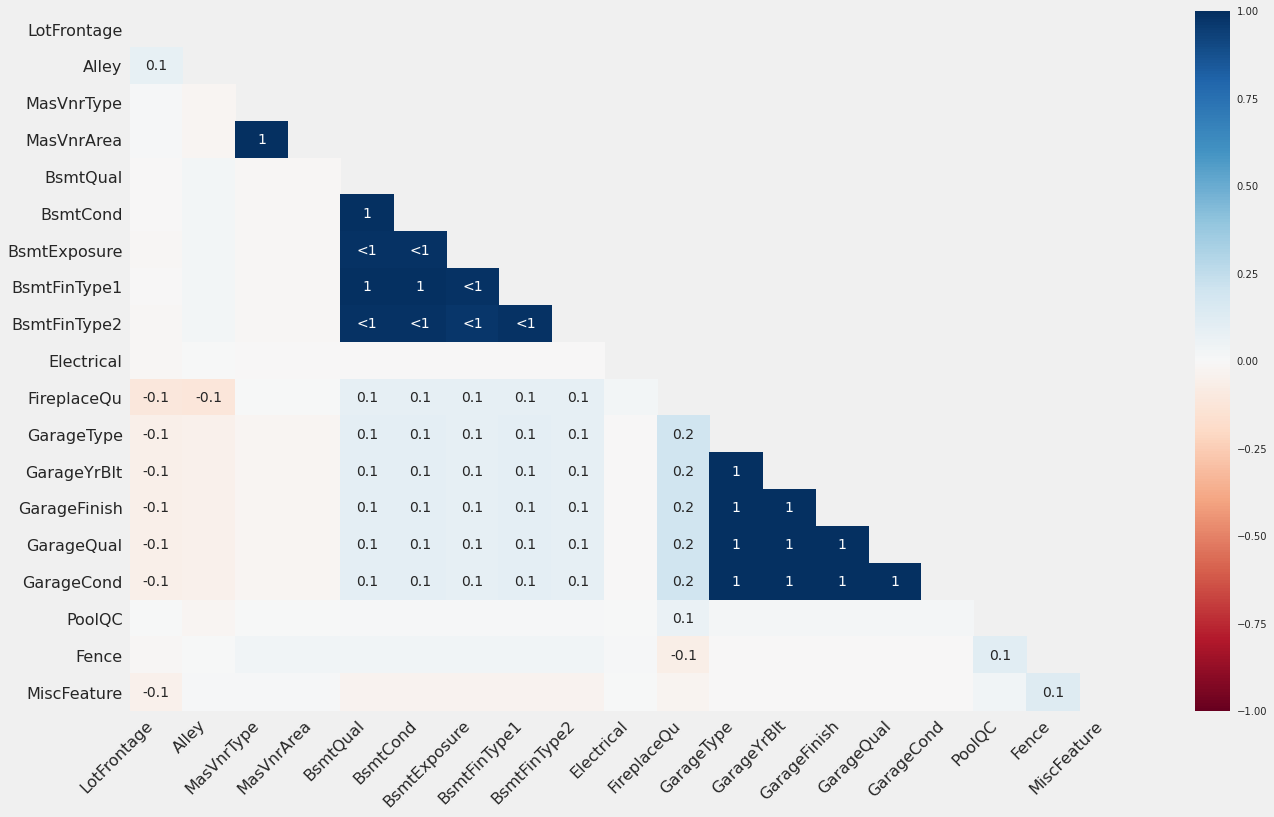

In [16]:
msno.heatmap(train)

### Things to Focus on EDA is Missing data adn outliers.